We were testing an adaptive linear control variate that goes through the initial condition.


7.580147608619978
7.902876516910177
3.0


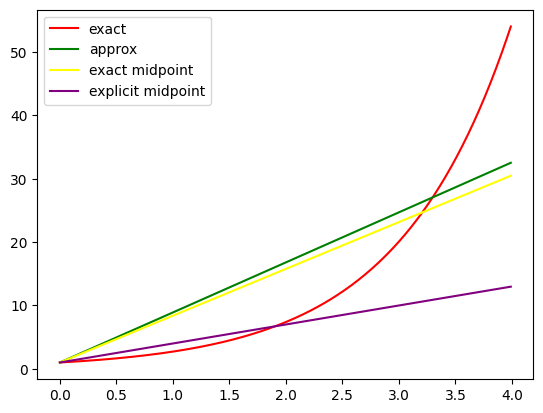

7.902876516910177


In [1]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

def control(x,a): return a*x+1

def Y(t,a): 
    S = random()*t
    return 1+t +a*t**2/2 + ((Y(S,a)-control(S,a) if random()<t else 0) if t<1 else t*(Y(S,a)-control(S,a)) )

def A(t,a):
    S = random()*t  
    return a+ 3*(Y(S,a)- a*S-1)*S/t**2

t = 4
a_mid = 1+t/2
a,nsim = a_mid,10**3
for _ in range(2):
    a = sum(A(t,a) for _ in range(nsim))/nsim 
    print(a)

xs = np.arange(0,t,0.01)
ys = np.exp(xs)
zs = a*xs+1
qs  = np.exp(t/2)*xs+1
a_mid = 1+t/2
print(a_mid)
qs2 = a_mid*xs+1
plt.plot(xs,ys,color="red", label="exact")
plt.plot(xs,zs,color="green", label="approx")
plt.plot(xs,qs,color="yellow", label="exact midpoint")
plt.plot(xs,qs2,color="purple", label="explicit midpoint")

plt.legend()
plt.show()
print(a)


Ok lets try to implement a second order Monte Carlo type ODE solver based on the midpoint method.

6.914360538579073e-07


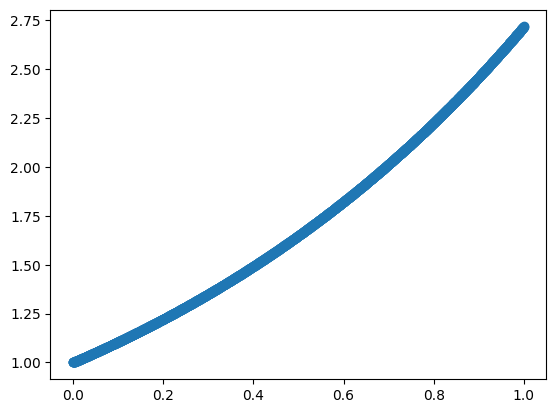

In [160]:
from random import random
from math import exp
import matplotlib.pyplot as plt



def Y_fast(t, T, yT, DT, a_mid):
    S = T + random()*(t-T)  # \sim Uniform(T,t)
    return yT + (yT-T*a_mid)*(t-T)+ a_mid*(t**2-T**2)/2 + (DT*(Y_fast(S, T, yT, DT, a_mid)- (yT + a_mid*(S-T))) if random() < (t-T)/DT else 0)

slow_points = []
def Y_slow(T, DT: "step size slow recursion"):
    TT = T-DT if T-DT > 0 else 0  # TT is where we are recursing to
    YTT = Y_slow(TT, DT) if T > 0 else 1
    a_mid = YTT + T*YTT/2
    sol = Y_fast(T, TT, YTT, T-TT, a_mid) if T > 0 else 1
    slow_points.append((T, sol))
    return sol


T, DT, nsim = 1, 0.0005, 1
sol = sum(Y_slow(T, DT) for _ in range(nsim))/nsim

x, y = zip(*slow_points)
plt.scatter(x, y)
plt.show()


In [279]:
from random import random
from math import exp
import matplotlib.pyplot as plt

def Y_fast(t, T, yT, DT):
    S = T + random()*(t-T)  # \sim Uniform(T,t)
    sol = yT +(t**2-T**2)*yT/2 + (t**3-T**3)*yT/6
    sol += (DT*(Y_fast(S, T, yT, DT)-S*yT-S**2*yT/2) if random() < (t-T)/DT else 0)
    return sol 


slow_points = []
def Y_slow(T, DT: "step size slow recursion"):
    y,t = 1,0
    while t<T:
        tt = t+DT if t+DT<T else T
        y = Y_fast(tt, t, y, tt-t) 
        slow_points.append((t, y))
        t=tt
    return y

T, nsim = 1, 10
def sol(T, DT, nsim ) : return sum(Y_slow(T, DT) for _ in range(nsim))/nsim

DTS = [0.1,0.01,0.001]
errors = [(sol(T, d, nsim )-exp(T))/(exp(T)*d**(1)) for d in DTS] 
print(errors)

#print(f"%error is ={(sol-exp(T))/exp(T)}")
'''  
x, y = zip(*slow_points)
plt.scatter(x, y)
plt.show()
'''
print("")

[-0.003812343968675481, 0.008522919082833674, 0.00012438872502031797]

